## __Clientes que abandonan un Banco__

__Introducción__

El objetivo principal es utilizar un metodo de clustering para agrupar a los clientes en segmentos con características similares. Estos segmentos nos servirán como base para diseñar estrategias de marketing específicas, con el fin de retener a nuestros clientes de manera más efectiva.

__Pasos Clave__

Exploración de Datos: Comenzaremos por explorar los datos del banco. Esto implica comprender la estructura de los datos, identificar características relevantes, y manejar cualquier dato faltante o atípico.

Preprocesamiento de Datos: Realizaremos tareas de limpieza, transformación y normalización de los datos. Esto garantiza que estén listos para su uso en el algoritmo de K-Means.

Selección de Características: Identificaremos las características más relevantes para el análisis y la segmentación. Esto podría incluir datos de transacciones, patrones de uso de tarjetas, edad, género, etc.

Aplicación de K-Means: Usaremos el algoritmo de K-Means para agrupar a los clientes en segmentos. Este proceso implica definir el número de clusters deseados y ejecutar el algoritmo.

Interpretación de Resultados: Analizaremos los grupos resultantes para comprender sus características únicas. Esto nos ayudará a definir estrategias de retención específicas para cada segmento.

Elaboración de Estrategias de Marketing: Con los segmentos identificados, diseñaremos estrategias de marketing personalizadas para retener a cada grupo. Esto podría incluir ofertas, servicios y comunicaciones adaptadas a las necesidades de cada segmento.

__En resumen, este proyecto se centra en aplicar el método de K-Means en la industria bancaria para segmentar a los clientes y diseñar estrategias de retención efectivas. Los pasos clave incluyen la exploración de datos, preprocesamiento, aplicación del algoritmo de K-Means y la elaboración de estrategias personalizadas. Este enfoque nos permite utilizar datos para tomar decisiones informadas y mejorar la retención de clientes en un banco.__

***
***

In [83]:
## librerias data analysis
import pandas as pd
import numpy as np

## librerias gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import squarify

## librerias machine learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score


#### Información por clientes de Banco para realizar segmentación de usuarios y predicción de abandono

El dataset elegido contiene información de los clientes

In [84]:
df_bank_churners = pd.read_csv('C:\\Users\\Ivan Kenigsberg\\Desktop\\BankChurners.csv',sep=',')


## __Data summary__

Resumimos la información del dataset, para entender con qué vamos a trabajar

In [85]:
df_bank_churners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [86]:
## Elimino las columnas que no van a ser utilizadas

columnas_delete = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]

df_bank_churners.drop(columnas_delete, axis=1, inplace=True)

pd.set_option('display.max_columns', None)
df_bank_churners.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Diccionario de datos

- CLIENTNUM: Número de cliente. Identificador único para el cliente que posee la cuenta.
- Attrition_Flag: Variable interna de eventos (actividad del cliente) - si la cuenta está cerrada, entonces es 1, de lo contrario, 0.
- Customer_Age: Edad del cliente en años.
- Gender: Género del cliente - M (Masculino), F (Femenino).
- Dependant_count: Número de dependientes.
- Education_Level: Nivel educativo del titular de la cuenta (ejemplo: secundaria, graduado universitario, etc.).
- Marital_Status: Estado civil - Casado, Soltero, Divorciado, Desconocido.
- Income_Category: Categoría de ingresos anuales del titular de la cuenta (< 40K, 40K - 60K, 60K - 80K, 80K-120K, >).
- Card_Category: Tipo de tarjeta (Azul, Plata, Oro, Platino).
- Months_on_book: Período de relación con el banco.
- Total_Relationship_Count: Número total de productos mantenidos por el cliente.
- Months_Inactive_12_mon: Número de meses inactivo en los últimos 12 meses.
- Contacts_Count_12_mon: Número de contactos en los últimos 12 meses.
- Credit_Limit: Límite de crédito en la tarjeta de crédito.
- Total_Revolving_Bal: Saldo total en la tarjeta de crédito que gira.
- Avg_Open_To_Buy: Línea de crédito disponible (promedio de los últimos 12 meses).
- Total_Amt_Chng_Q4_Q1: Cambio en la cantidad de transacciones (T4 sobre T1).
- Total_Trans_Amt: Cantidad total de transacciones (últimos 12 meses).
- Total_Trans_Ct: Cantidad total de transacciones (últimos 12 meses).
- Total_Ct_Chng_Q4_Q1: Cambio en la cantidad de transacciones (T4 sobre T1).
- Avg_Utilization_Ratio: Razón de utilización promedio de la tarjeta.

## __Exploratory data analyisis__
Exploramos a fondo el dataset con el que vamos a trabajar

In [87]:
## Calculo estadísticas resumidas para cada columna numérica en el dataset, las redondeo y hago la transposición
df_bank_churners.describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,739177606.0,36903783.0,708082083.0,713036770.0,717926358.0,773143533.0,828343083.0
Customer_Age,10127.0,46.0,8.0,26.0,41.0,46.0,52.0,73.0
Dependent_count,10127.0,2.0,1.0,0.0,1.0,2.0,3.0,5.0
Months_on_book,10127.0,36.0,8.0,13.0,31.0,36.0,40.0,56.0
Total_Relationship_Count,10127.0,4.0,2.0,1.0,3.0,4.0,5.0,6.0
Months_Inactive_12_mon,10127.0,2.0,1.0,0.0,2.0,2.0,3.0,6.0
Contacts_Count_12_mon,10127.0,2.0,1.0,0.0,2.0,2.0,3.0,6.0
Credit_Limit,10127.0,8632.0,9089.0,1438.0,2555.0,4549.0,11068.0,34516.0
Total_Revolving_Bal,10127.0,1163.0,815.0,0.0,359.0,1276.0,1784.0,2517.0
Avg_Open_To_Buy,10127.0,7469.0,9091.0,3.0,1324.0,3474.0,9859.0,34516.0


In [88]:
## Muestro estadísticas resumidadas para las columnas categóricas
df_bank_churners.describe(include='O').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [89]:
## Reviso nulos
df_bank_churners.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [90]:
## Reviso duplicados
df_bank_churners.duplicated().any()

False

***
Exploramos las variables categóricas
***

In [91]:
clientes_totales = df_bank_churners['CLIENTNUM'].nunique()
attrition_counts = df_bank_churners['Attrition_Flag'].value_counts()

print("Clientes totales:", clientes_totales)
print("Clientes por categoría:")
print(attrition_counts)

Clientes totales: 10127
Clientes por categoría:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


Cómo se compone nuestra cartera de clientes? El 84% son clientes existentes y 16% ya abadonaron el banco.

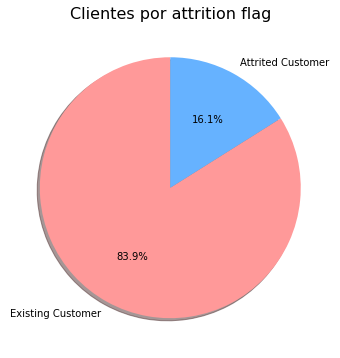

In [92]:
# Calcular los valores y etiquetas para el gráfico de torta
interacciones = df_bank_churners['Attrition_Flag'].value_counts()
etiquetas = interacciones.index
valores = interacciones.values

# Definir colores personalizados para el gráfico de torta
colores_personalizados = ['#FF9999', '#66B2FF']

# Crear una figura y ejes con fondo blanco
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('white')

# Crear el gráfico de torta
ax.pie(valores, labels=etiquetas, colors=colores_personalizados, autopct='%1.1f%%', startangle=90, shadow=True)

# Establecer un título
ax.set_title('Clientes por attrition flag', fontsize=16)

# Mostrar el gráfico
plt.show()

Qué tipos de clientes tenemos?
Uso gráfico de barras para entender la distribución de categorías de las tarjetas y se observa que el 93% es de categoría Blue, la más baja de todas.

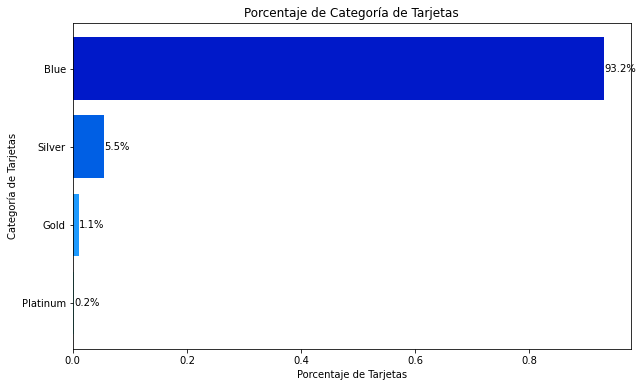

In [93]:
# Calcular el porcentaje de categorías de tarjetas
tarjetas_categoria = df_bank_churners['Card_Category'].value_counts()
total_tarjetas = tarjetas_categoria.sum()
porcentaje_tarjetas_categoria = (tarjetas_categoria / total_tarjetas)

# Crear una paleta de colores personalizada con un color más claro para la categoría menos importante
colores_personalizados = ['#0019C9', '#005FE4', '#1D9AFF', '#76FFF1']  # Agregar más colores según sea necesario

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')

# Crear el gráfico de barras
bars = plt.barh(porcentaje_tarjetas_categoria.index, porcentaje_tarjetas_categoria.values, color=colores_personalizados)

# Agregar etiquetas de porcentaje a cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1%}', ha='left', va='center')

# Configurar los ejes y el título
plt.xlabel('Porcentaje de Tarjetas')
plt.ylabel('Categoría de Tarjetas')
plt.title('Porcentaje de Categoría de Tarjetas')

# Invertir el eje y para mostrar el mayor porcentaje en la parte superior
plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()

Uso gráfico de barras para entender la distribución de clientes por ingresos, nuevamente la más baja ("Less than $40k") es la que tiene mayor cantidad de clientes (3561)

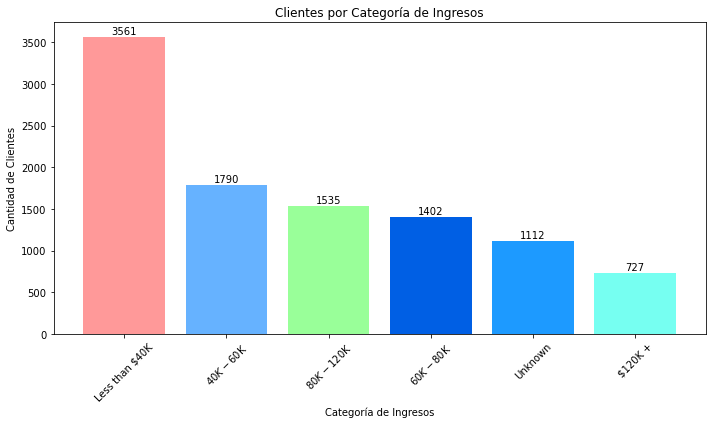

In [94]:
# Calcular los valores y etiquetas para el gráfico de barras
clientes_categoria = df_bank_churners['Income_Category'].value_counts().reset_index()
clientes_categoria.columns = ['Categoría de Ingresos', 'Cantidad de Clientes']
colores_personalizados = ['#FF9999', '#66B2FF', '#99FF99', '#005FE4', '#1D9AFF', '#76FFF1']

# Calcular el número total de clientes
total_clientes = clientes_categoria['Cantidad de Clientes'].sum()

# Calcular el porcentaje para cada categoría
clientes_categoria['Porcentaje'] = round((clientes_categoria['Cantidad de Clientes'] / total_clientes) * 100, 2)

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')

# Crear el gráfico de barras
bars = plt.bar(clientes_categoria['Categoría de Ingresos'], clientes_categoria['Cantidad de Clientes'], color=colores_personalizados)

# Agregar etiquetas de valor en las barras
for bar, label in zip(bars, clientes_categoria['Cantidad de Clientes']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, label, ha='center', va='bottom')

# Configurar los ejes y el título
plt.xlabel('Categoría de Ingresos')
plt.ylabel('Cantidad de Clientes')
plt.title('Clientes por Categoría de Ingresos')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
plt.tight_layout()  # Ajustar el diseño
plt.show()

Uso de gráfico de torta para ver si tenemos una cartera que se incline hacia algun género, para entender si vale la pena hacer análisis por género, pero está bastante balanceada.

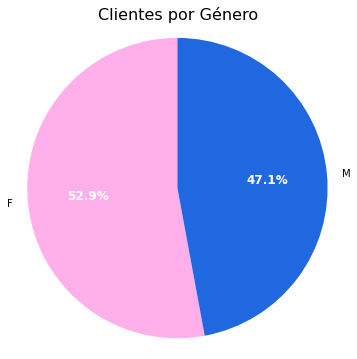

In [95]:
# Calcular los valores y etiquetas para el gráfico de torta
genero_clientes = df_bank_churners['Gender'].value_counts().reset_index()
genero_clientes.columns = ['Género', 'Cantidad de Clientes']

# Calcular el número total de clientes
total_clientes = genero_clientes['Cantidad de Clientes'].sum()

# Calcular el porcentaje para cada género
genero_clientes['Porcentaje'] = (genero_clientes['Cantidad de Clientes'] / total_clientes) * 100

# Definir colores personalizados para el gráfico de torta
colores_personalizados = ['#FFAFE9', '#2068DF']

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('white')

# Crear el gráfico de torta
pie_wedge_collection, texts, autotexts = ax.pie(genero_clientes['Porcentaje'], labels=genero_clientes['Género'],
                                                autopct='%1.1f%%', colors=colores_personalizados, startangle=90)

# Personalizar el diseño
ax.axis('equal')  # Hace que el gráfico de torta sea circular

# Configurar el título
ax.set_title('Clientes por Género', fontsize=16)

# Personalizar etiquetas de porcentaje
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

# Mostrar el gráfico
plt.show()


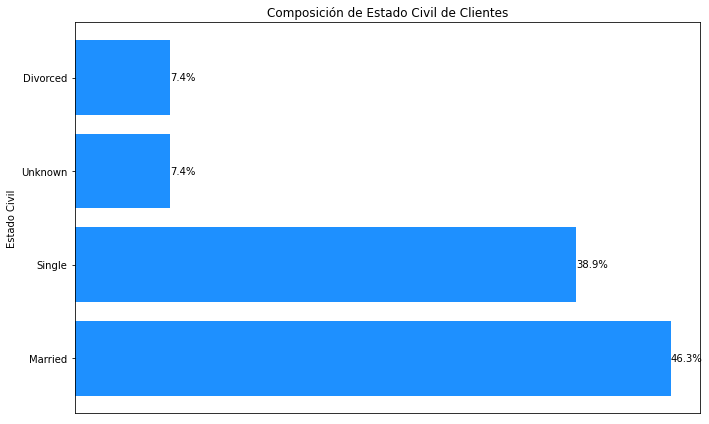

In [96]:
# Calcular los valores y etiquetas para el gráfico de barras horizontal único
clientes_estado_civil = df_bank_churners['Marital_Status'].value_counts().reset_index()
clientes_estado_civil.columns = ['Estado Civil', 'Cantidad de Clientes']

# Calcular el número total de clientes
total_clientes = clientes_estado_civil['Cantidad de Clientes'].sum()

# Calcular el porcentaje para cada estado civil
clientes_estado_civil['Porcentaje'] = (clientes_estado_civil['Cantidad de Clientes'] / total_clientes) * 100

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')

# Crear el gráfico de barras horizontal
bars = plt.barh(clientes_estado_civil['Estado Civil'], clientes_estado_civil['Porcentaje'], color='dodgerblue')

# Agregar etiquetas de porcentaje en las barras
for bar, label in zip(bars, clientes_estado_civil['Porcentaje']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{label:.1f}%', ha='left', va='center')

# Configurar los ejes y el título
plt.xlabel('Porcentaje')
plt.ylabel('Estado Civil')
plt.title('Composición de Estado Civil de Clientes')

# Eliminar la etiqueta del eje x
ax.get_xaxis().set_visible(False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

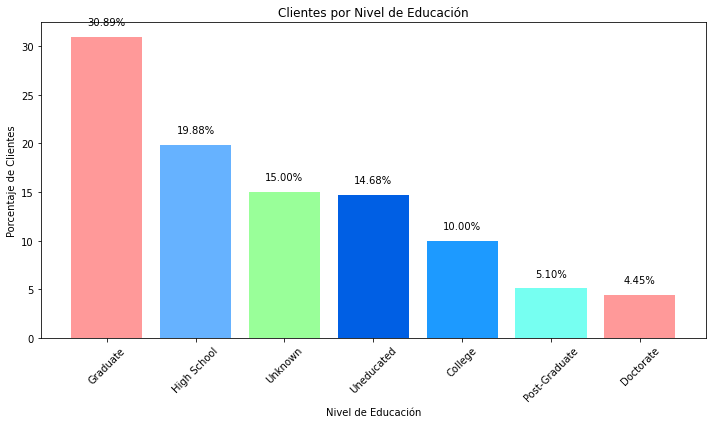

In [97]:
# Calcular los valores y etiquetas para el gráfico de barras
clientes_educacion = df_bank_churners['Education_Level'].value_counts().reset_index()
clientes_educacion.columns = ['Nivel de Educación', 'Cantidad de Clientes']
colores_personalizados = ['#FF9999', '#66B2FF', '#99FF99', '#005FE4', '#1D9AFF', '#76FFF1']

# Calcular el número total de clientes
total_clientes = clientes_educacion['Cantidad de Clientes'].sum()

# Calcular el porcentaje para cada nivel de educación
clientes_educacion['Porcentaje'] = round((clientes_educacion['Cantidad de Clientes'] / total_clientes) * 100, 2)

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')

# Crear el gráfico de barras
bars = plt.bar(clientes_educacion['Nivel de Educación'], clientes_educacion['Porcentaje'], color=colores_personalizados)

# Agregar etiquetas de porcentaje en las barras
for bar, label in zip(bars, clientes_educacion['Porcentaje']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{label:.2f}%', ha='center', va='bottom')

# Configurar los ejes y el título
plt.xlabel('Nivel de Educación')
plt.ylabel('Porcentaje de Clientes')
plt.title('Clientes por Nivel de Educación')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
plt.tight_layout()  # Ajustar el diseño
plt.show()


In [98]:
def education_categories(row):
    if row['Education_Level'] in ['Doctorate', 'Post-Graduate']:
        return 'Advanced education'
    if row['Education_Level'] in ['College', 'Graduate']:
        return 'Higher education'
    else:
        return 'Basic education'

# Aplicar la función personalizada para crear una nueva columna con categorías combinadas
df_bank_churners['Combined education'] = df_bank_churners.apply(education_categories, axis=1)

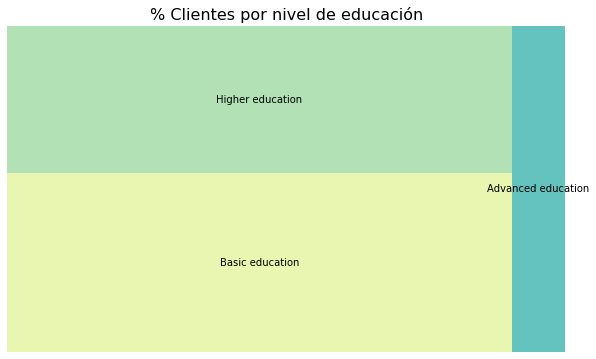

In [99]:
# Calcular el porcentaje de clientes en cada categoría de educación combinada
education_counts_2 = df_bank_churners['Combined education'].value_counts(normalize=True).reset_index()
education_counts_2.columns = ['Combined education', 'Percentage']

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')

# Crear el treemap
squarify.plot(sizes=education_counts_2['Percentage'], label=education_counts_2['Combined education'], ax=ax, color=sns.color_palette('YlGnBu'))

# Configurar el título
plt.title('% Clientes por nivel de educación', fontsize=16)

# Eliminar ejes
ax.axis('off')

# Mostrar el treemap
plt.show()

***
Exploramos las variables numéricas
***

In [100]:
### Creo una función para graficar todas las variables numericas con histogramas y boxplot para enteder rápidamente
def hist_boxplot(var):
     # Crear una figura más grande
    plt.figure(figsize=(12, 6))

    # Primer gráfico en el subplot izquierdo
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_bank_churners, x=var, hue='Attrition_Flag', kde=True)
    
    # Segundo gráfico en el subplot derecho
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Attrition_Flag', y=var, data=df_bank_churners)

    # Mostrar la figura
    plt.show()

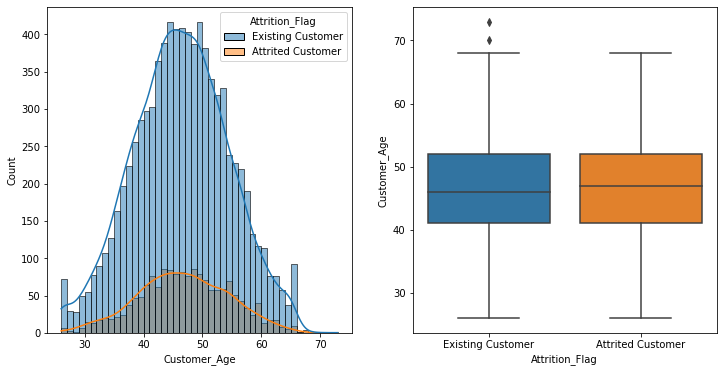

In [101]:
hist_boxplot('Customer_Age')

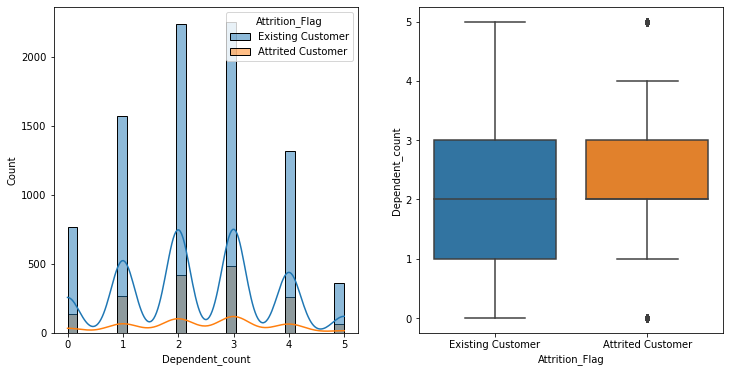

In [102]:
hist_boxplot('Dependent_count')

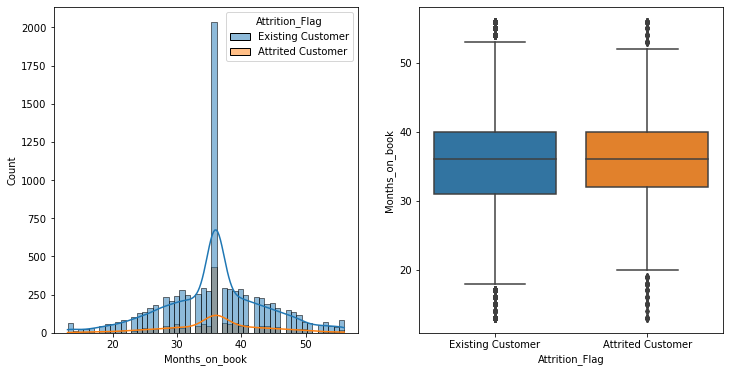

In [103]:
hist_boxplot('Months_on_book')

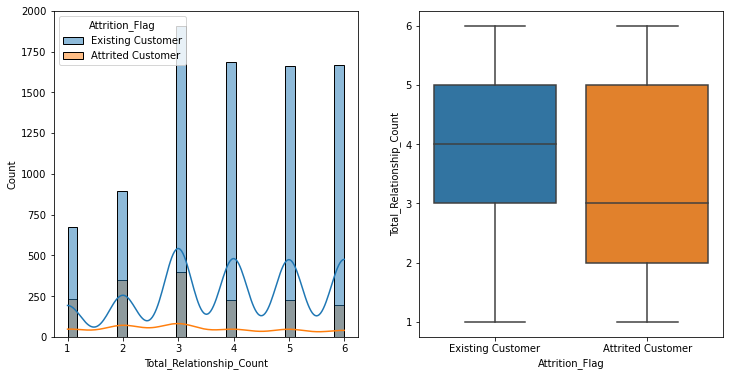

In [104]:
hist_boxplot('Total_Relationship_Count')

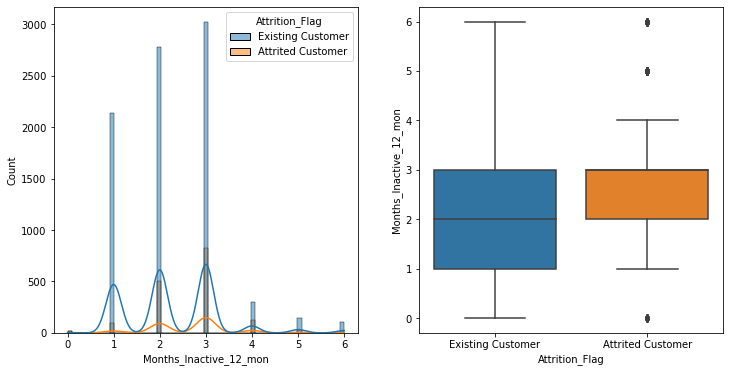

In [105]:
hist_boxplot('Months_Inactive_12_mon')

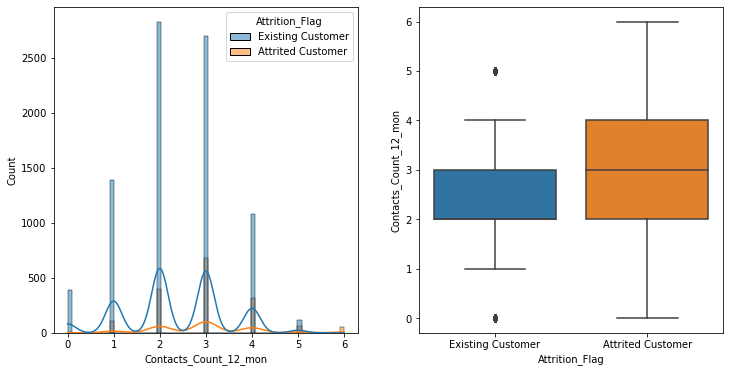

In [106]:
hist_boxplot('Contacts_Count_12_mon')

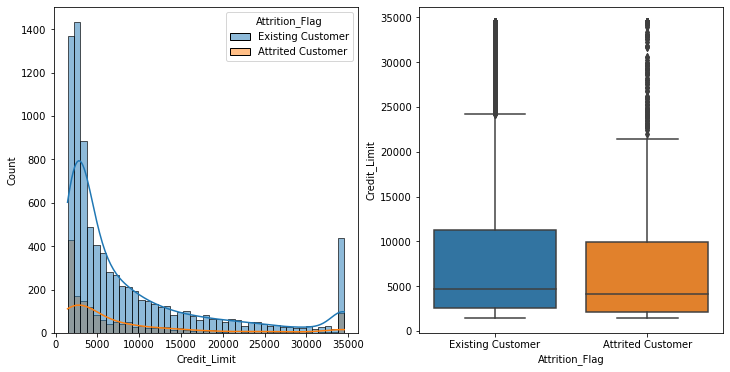

In [107]:
hist_boxplot('Credit_Limit')

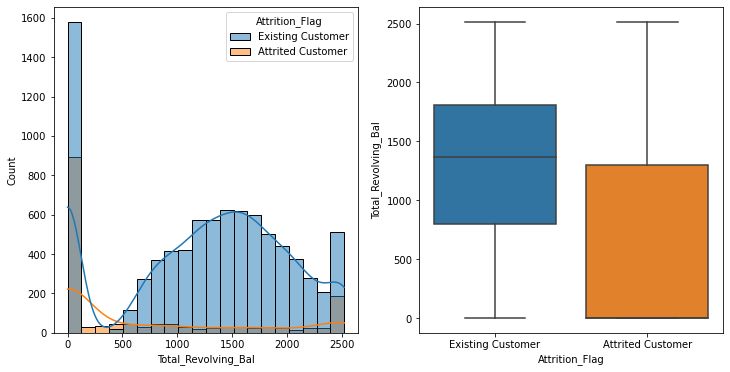

In [108]:
hist_boxplot('Total_Revolving_Bal')

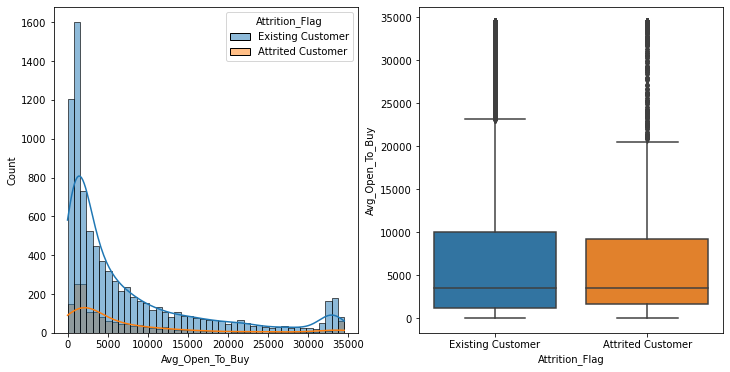

In [109]:
hist_boxplot('Avg_Open_To_Buy')

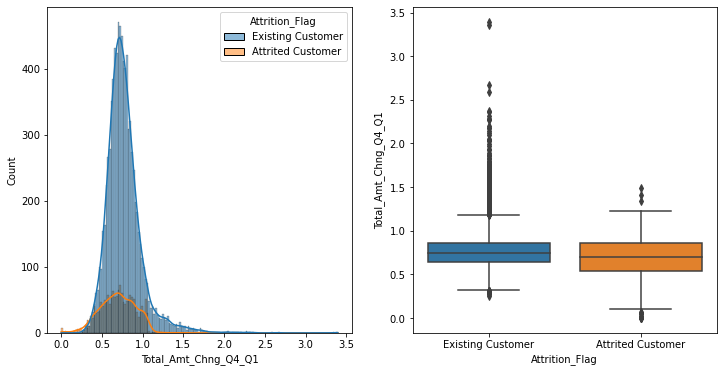

In [110]:
hist_boxplot('Total_Amt_Chng_Q4_Q1')

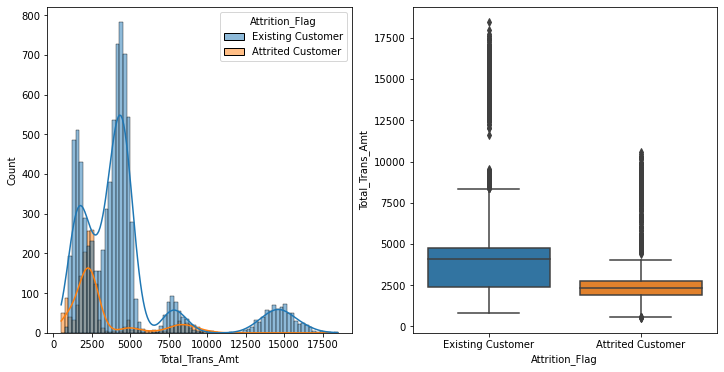

In [111]:
hist_boxplot('Total_Trans_Amt')

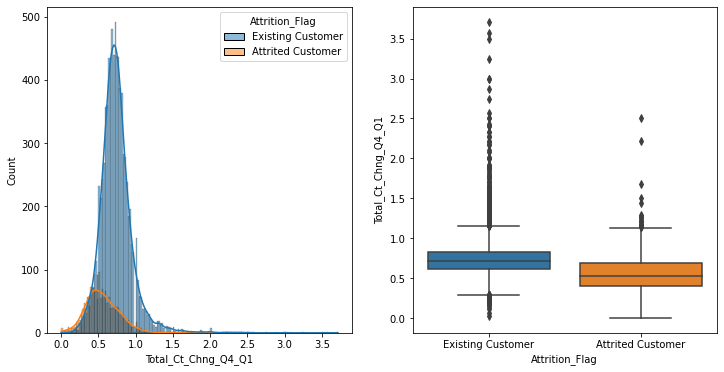

In [112]:
hist_boxplot('Total_Ct_Chng_Q4_Q1')

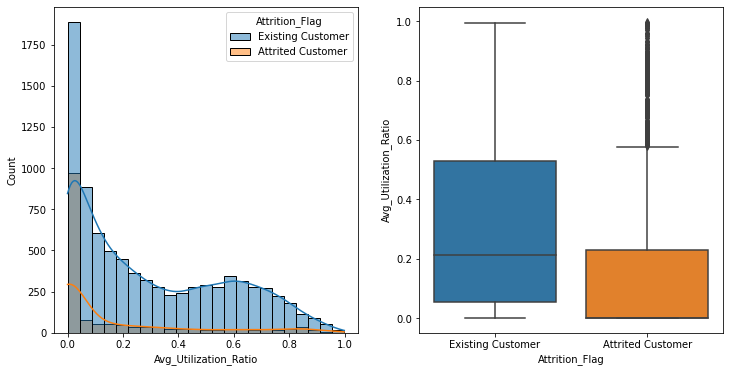

In [113]:
hist_boxplot('Avg_Utilization_Ratio')

***
***

## __Clustering__

#### Uso de K-MEANS Clustering para encontrar grupos de clientes similares a los cuales se le podrían aplicar acciones comerciales o de marketing diferenciadas de acuerdo a sus caracteristicas, para evitar el abandono

Podría hacer uso de K-means, K-modes o K-prototypes:
- K-Means para datos numéricos
- K-Modes para datos categóricos
- K-Prototypes para datos mixtos.

En este caso se trata de un dataset con datos mixtos, con mayor participación de datos numéricos.El uso de K-means estara enfocado en el uso de las variables numéricas de los clientes, que corresponde a su actividad transaccional en el banco.

__K-Means: es un algoritmo de clustering que busca dividir un conjunto de datos en K clusters, donde K es un número que se define previamente.__ 

El algoritmo funciona de la siguiente manera:

- Inicializa K centroides de manera aleatoria en el espacio de características.
- Asigna cada punto de datos al centroide más cercano.
- Calcula nuevos centroides para cada cluster como el centroide promedio de los puntos asignados a ese cluster.
- Repite los pasos anteriores hasta que los centroides converjan, es decir, hasta que no haya cambios significativos en la asignación de puntos a clusters.

Para determinar el número de clusters utilizo el metodo del codo

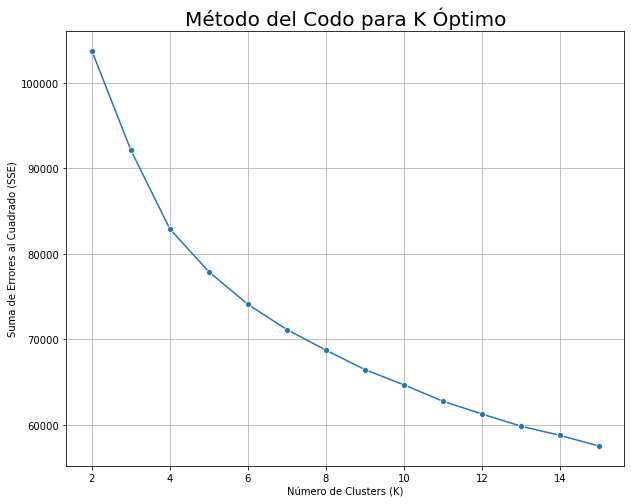

In [114]:
numerical_columns = ['Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit','Avg_Open_To_Buy','Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

X = df_bank_churners[numerical_columns]

data = StandardScaler().fit_transform(X)

sse = []  # Cambié el nombre de la variable a sse

for i in range(2, 16):
    km = KMeans(n_clusters=i, max_iter=1000, random_state=10)
    km.fit(data)
    sse.append(km.inertia_)  # Cambié el nombre de la variable a sse

fig = plt.figure(figsize=(10, 8))
ax = sns.lineplot(x=list(range(2, 16)), y=sse,marker="o")  # Cambié el nombre de la variable a sse
ax.set_title('Método del Codo para K Óptimo')  # Actualicé el título
ax.title.set_size(20)
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Suma de Errores al Cuadrado (SSE)')  # Actualicé la etiqueta del eje y
ax.grid(True)  # Agregué una grilla al gráfico
plt.show()

El método del codo evalúa la calidad de las agrupaciones en un algoritmo K-Means utilizando la SSE (Suma de Errores al Cuadrado), que mide cuánto se alejan los puntos de datos de sus centroides en los clústeres. Un valor bajo de SSE indica clústeres compactos y cohesivos, lo que representa una buena calidad de agrupación. Buscamos el punto óptimo de K que representa un equilibrio entre la cantidad de clústeres y la calidad de la agrupación. En este caso, lo óptimo paracería ser K=4.

Utilizamos otras métricas para aseguararnos una elección adecuada de K.

In [115]:
# Crear un DataFrame con datos
results = pd.DataFrame({
    'Número de Clústeres': [],
    'Puntuación de Davies Bouldin': [],
    'Puntuación de Silhouette': [],
})

for k in range(2, 10):
    # Inicializar el modelo K-means
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=10).fit(X)
    clusters = kmeans.labels_
    
    # Calcular las puntuaciones para cada método
    db_score = davies_bouldin_score(X, clusters)
    slc_score = silhouette_score(X, clusters)
        
    # Crear un DataFrame para los resultados actuales
    current_results = pd.DataFrame({
        'Número de Clústeres': [k],
        'Puntuación de Davies Bouldin': [db_score],
        'Puntuación de Silhouette': [slc_score]
    })

    # Concatenar los resultados actuales con el DataFrame general de resultados
    results = pd.concat([results, current_results], ignore_index=True)

# Calcular los rankings en el DataFrame general de resultados
results['Ranking de Davies Bouldin'] = results['Puntuación de Davies Bouldin'].rank(ascending=True)
results['Ranking de Silhouette'] = results['Puntuación de Silhouette'].rank(ascending=False)

# Establecer el número de clústeres como el índice
results.set_index('Número de Clústeres', inplace=True)

# Mostrar el DataFrame de resultados con los rankings
results

,Puntuación de Davies Bouldin,Puntuación de Silhouette,Ranking de Davies Bouldin,Ranking de Silhouette
Número de Clústeres,,,,
2.0,0.511118,0.708752,1.0,1.0
3.0,0.623985,0.600599,2.0,2.0
4.0,0.725263,0.529176,5.0,4.0
5.0,0.668036,0.560467,3.0,3.0
6.0,0.727072,0.504230,6.0,5.0
7.0,0.709040,0.500167,4.0,6.0
8.0,0.745772,0.450941,8.0,8.0
9.0,0.732844,0.452385,7.0,7.0


Las métricas de Davies Bouldin y Silhouette proporcionan información sobre la calidad de los clústeres:

- Davies Bouldin mide la compacidad y la separación de los clústeres. Cuanto más bajo sea su valor, mejor.

- Silhouette Score mide cuán bien están separados los clústeres. Cuanto más alto sea su valor, mejor.

Podemos observar que K=3 tiene puntuaciones competitivas en ambas métricas. Y además, hace sentido de negocio, por lo que será 3 el número de clusters seleccionados.

In [116]:
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=10)
kmeans.fit(X)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [117]:
df_bank_churners['cluster'] = cluster_labels
df_bank_churners.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Combined education,cluster
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,Basic education,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,Higher education,1
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,Higher education,1
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,Basic education,1
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,Basic education,1


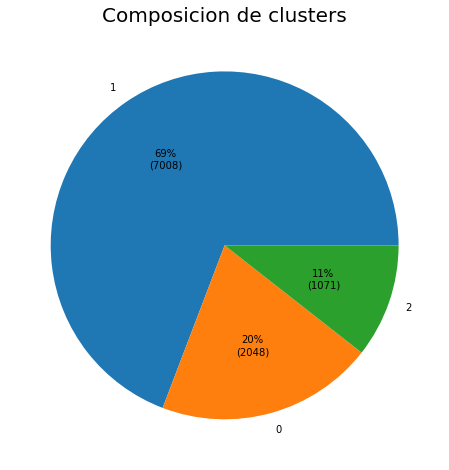

In [118]:
fig, axs = plt.subplots(figsize=(12,8))
fig.patch.set_facecolor('white')
ax = df_bank_churners['cluster'].value_counts()

# Calcular el valor total de recuentos de cluster
total_cluster_counts = ax.sum()

ax = ax.plot.pie(autopct=lambda p: '{:.0f}%\n({:.0f})'.format(p, p * total_cluster_counts / 100))
ax.set_ylabel('')
ax.set_title('Composicion de clusters')
ax.title.set_size(20)
plt.show()


***
***

## __Interpretación de resultados__

In [119]:
df_bank_churners_scaled = pd.DataFrame(data,columns=numerical_columns)
df_bank_churners_scaled['cluster'] = cluster_labels
df_bank_churners_scaled


,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Avg_Open_To_Buy,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,cluster
0,0.384621,0.763943,-1.327136,0.492404,0.446622,0.488971,-0.473422,2.623494,-0.959707,-0.973895,3.834003,-0.775882,0
1,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.008486,-0.366667,3.563293,-0.916433,-1.357340,12.608573,-0.616276,1
2,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-0.445658,-1.426858,8.367214,-0.740982,-1.911206,6.807864,-0.997155,1
3,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,-0.734100,1.661686,2.942843,-0.951758,-1.911206,6.807864,1.759686,1
4,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-0.302868,-1.426858,6.455682,-1.056263,-1.570365,7.509325,-0.997155,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.509840,-0.522785,-0.337598,0.492404,-0.509330,-0.584929,0.844455,-0.259771,3.259358,2.221481,0.608119,0.678714,1
10123,-1.368442,0.120579,-0.337598,0.492404,-0.479181,-0.591639,1.255524,0.201004,1.283475,0.176440,-0.122745,0.856458,1
10124,0.008965,0.763943,0.651940,1.396424,-0.354626,-0.226632,-1.426858,0.269436,1.732994,-0.207005,0.444305,-0.997155,1
10125,0.008965,0.120579,0.651940,0.492404,-0.368710,-0.240713,-1.426858,-1.026208,1.174848,-0.121795,0.041070,-0.997155,1


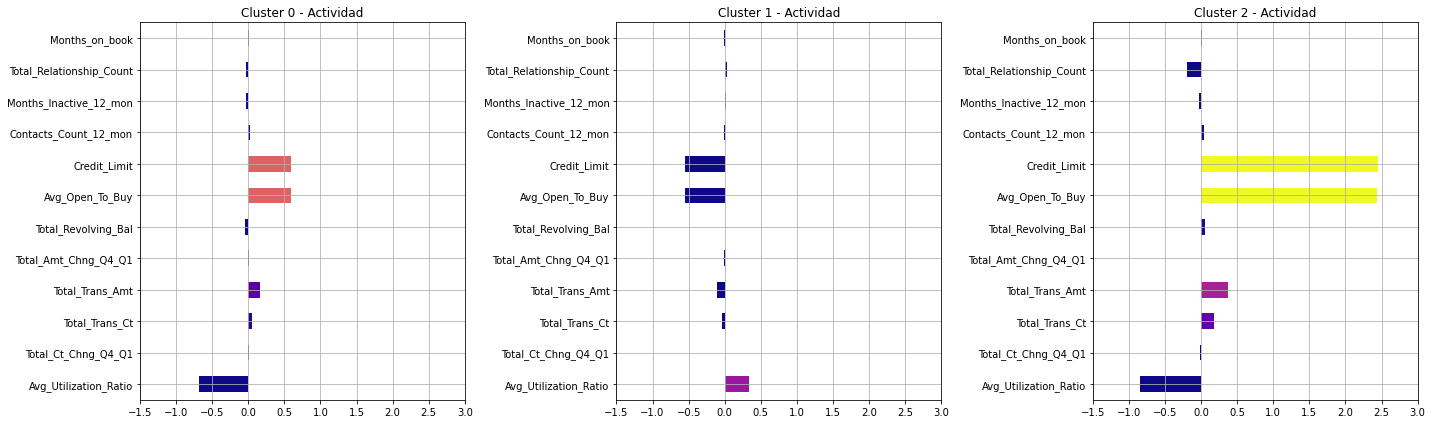

In [120]:
# Define los clusters que deseas analizar
clusters_a_analizar = [0, 1, 2]

# Crea subtramas para varios clusters uno al lado del otro
fig, axs = plt.subplots(1, len(clusters_a_analizar), figsize=(20, 6))
cmap = plt.cm.get_cmap('plasma')

for i, cluster in enumerate(clusters_a_analizar):
    media_grupo = df_bank_churners_scaled[df_bank_churners_scaled['cluster'] == cluster][numerical_columns].mean()
    colores = [cmap(val) for val in media_grupo]
    # Crea un gráfico de barras horizontal con una paleta de colores degradados y líneas de cuadrícula
    ax = media_grupo.plot.barh(ax=axs[i], xlim=(-1.5, 3), color=colores, grid=True)
    ax.set_title(f'Cluster {cluster} - Actividad')
    ax.invert_yaxis()  # Invierte el eje y para una mejor visualización

# Ajusta el espacio entre las subtramas
plt.tight_layout()
plt.show()


Las principales variables que muestran diferencias entre clusters son:
- Credit_limit (limite de credito en la tarjeta)
- Avg_open_to_buy (línea de crédito)
- Utilization_ratio (utilizacion de tarjeta)

In [121]:
median_values = df_bank_churners.groupby('cluster')[['Credit_Limit','Avg_Open_To_Buy', 'Avg_Utilization_Ratio']].median()
median_values


,Credit_Limit,Avg_Open_To_Buy,Avg_Utilization_Ratio
cluster,,,
0,13219.5,12120.0,0.0855
1,3035.0,1739.5,0.3510
2,33441.0,31999.0,0.0420


Según su tipo de actividad, los clusters son los siguientes:

- Cluster 0: Crédito medio, poco uso
- Cluster 1: Bajo crédito, mucho uso
- Cluster 2: Mucho crédito, poco uso


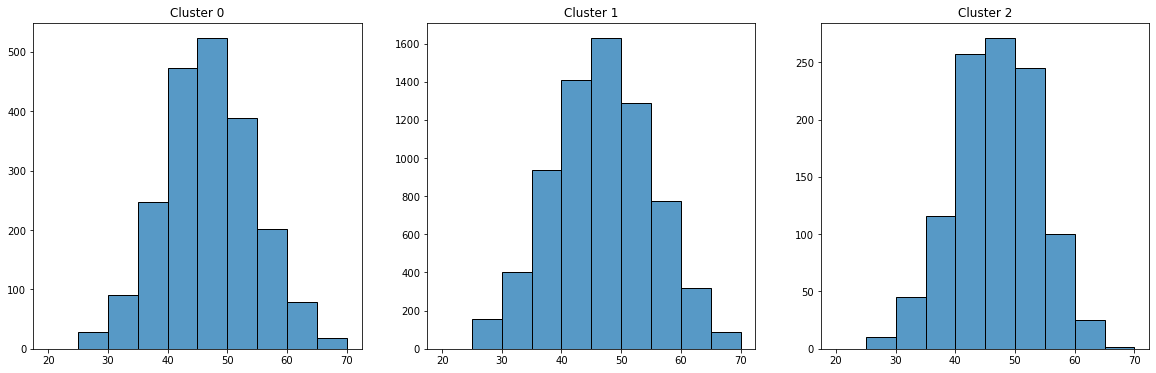

In [122]:
clusters_to_plot = [0, 1, 2] 

# Crea subtramas para varios clusters uno al lado del otro
fig, axs = plt.subplots(1, len(clusters_to_plot), figsize=(20, 6))

for i, cluster in enumerate(clusters_to_plot):
    sns.histplot(df_bank_churners[df_bank_churners['cluster'] == cluster]['Customer_Age'], ax=axs[i], binrange=(20, 70), binwidth=5)
    axs[i].set(title=f'Cluster {cluster}', ylabel='', xlabel='')

plt.show()

La edad de todos los clusters está entre los 40 y 50 años, con un promedio de 46 años.

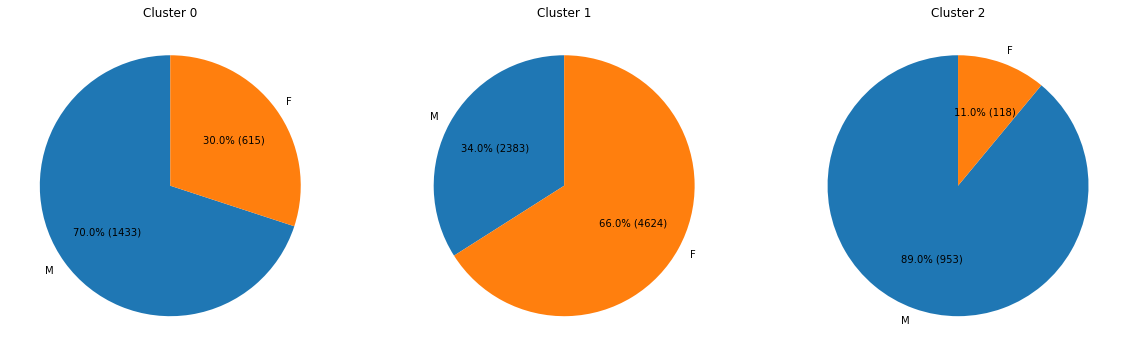

In [123]:
clusters_to_plot = [0, 1, 2]  

# Crea subtramas para varios clusters uno al lado del otro
fig, axs = plt.subplots(1, len(clusters_to_plot), figsize=(20, 6))

for i, cluster in enumerate(clusters_to_plot):
    ax = axs[i]
    fig.patch.set_facecolor('white')
    cluster_data = df_bank_churners[df_bank_churners['cluster'] == cluster]['Gender'].value_counts().sort_index(ascending=False)
    ax.pie(cluster_data, labels=cluster_data.index, autopct=(lambda p: f'{p:.1f}% ({int(p * cluster_data.sum() / 100)})'), startangle=90)
    ax.set_title(f'Cluster {cluster}')

plt.show()


Existen diferencias significativas en la composición de los clusters por género. Los clusters 0 y 2 son predominantemente masculinos, mientras que el cluster 1 es mayormente femenino.

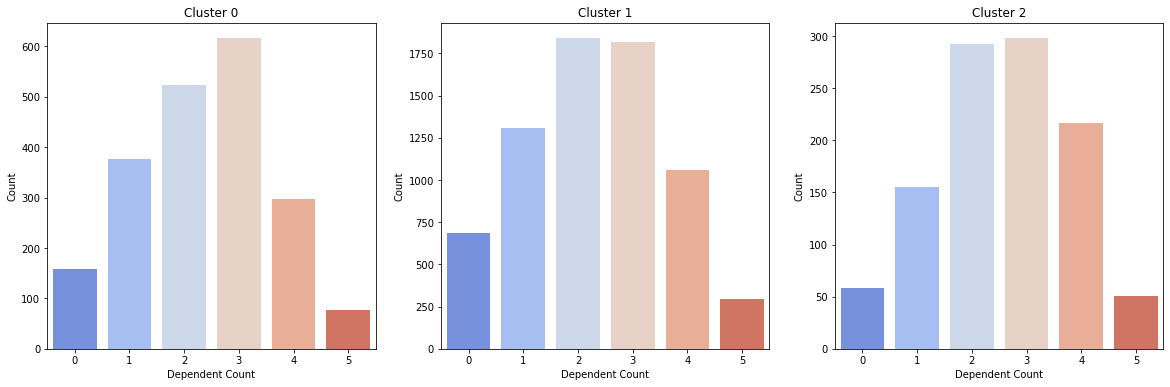

In [124]:
clusters_to_plot = [0, 1, 2]  

# Crea subtramas para varios clusters uno al lado del otro
fig, axs = plt.subplots(1, len(clusters_to_plot), figsize=(20, 6))

for i, cluster in enumerate(clusters_to_plot):
    ax = axs[i]
    ax.set_facecolor('white')
    sns.countplot(data=df_bank_churners[df_bank_churners['cluster'] == cluster], x='Dependent_count', ax=ax, palette='coolwarm')
    ax.set(title=f'Cluster {cluster}', xlabel='Dependent Count', ylabel='Count')

plt.show()

No hay diferencias significativas en la cantidad de dependientes entre los distintos clusters, con un promedio de entre 2 y 3.

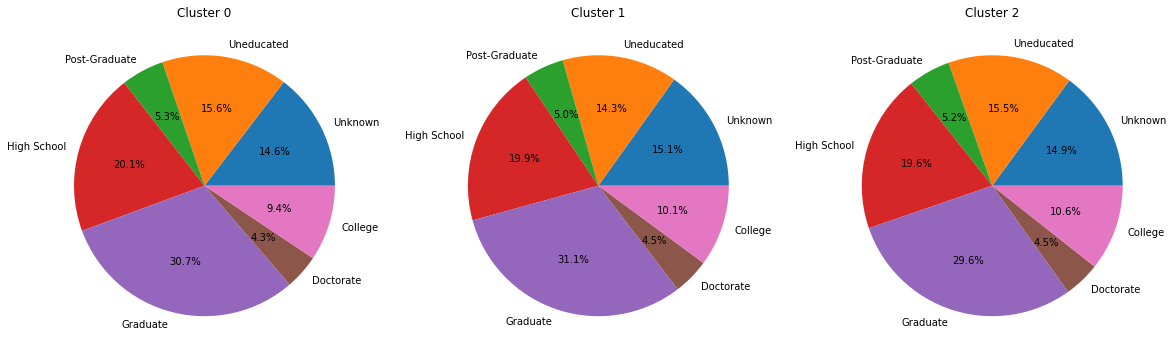

In [125]:
clusters_to_plot = [0, 1, 2] 

# Crea subtramas para varios clusters uno al lado del otro
fig, axs = plt.subplots(1, len(clusters_to_plot), figsize=(20, 6))

for i, cluster in enumerate(clusters_to_plot):
    ax = axs[i]
    fig.patch.set_facecolor('white')    
    df_bank_churners[df_bank_churners['cluster'] == cluster]['Education_Level'].value_counts().sort_index(ascending=False).plot.pie(ax=ax, ylabel='', title=f'Cluster {cluster}', autopct='%.1f%%')

plt.show()

Tampoco hay diferencias significativas entre en el nivel de educación de los clientes de cada cluster.

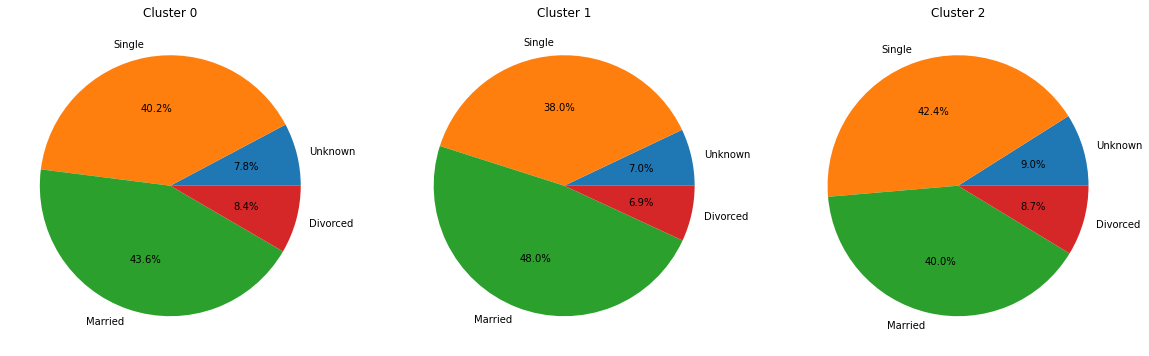

In [126]:
clusters_to_plot = [0, 1, 2] 

# Crea subtramas para varios clusters uno al lado del otro
fig, axs = plt.subplots(1, len(clusters_to_plot), figsize=(20, 6))

for i, cluster in enumerate(clusters_to_plot):
    ax = axs[i]
    fig.patch.set_facecolor('white')    
    df_bank_churners[df_bank_churners['cluster'] == cluster]['Marital_Status'].value_counts().sort_index(ascending=False).plot.pie(ax=ax, ylabel='', title=f'Cluster {cluster}', autopct='%.1f%%')

plt.show()

Ni tampoco hay diferencias significativas en el estado civil de las personas de los distintos clusters.

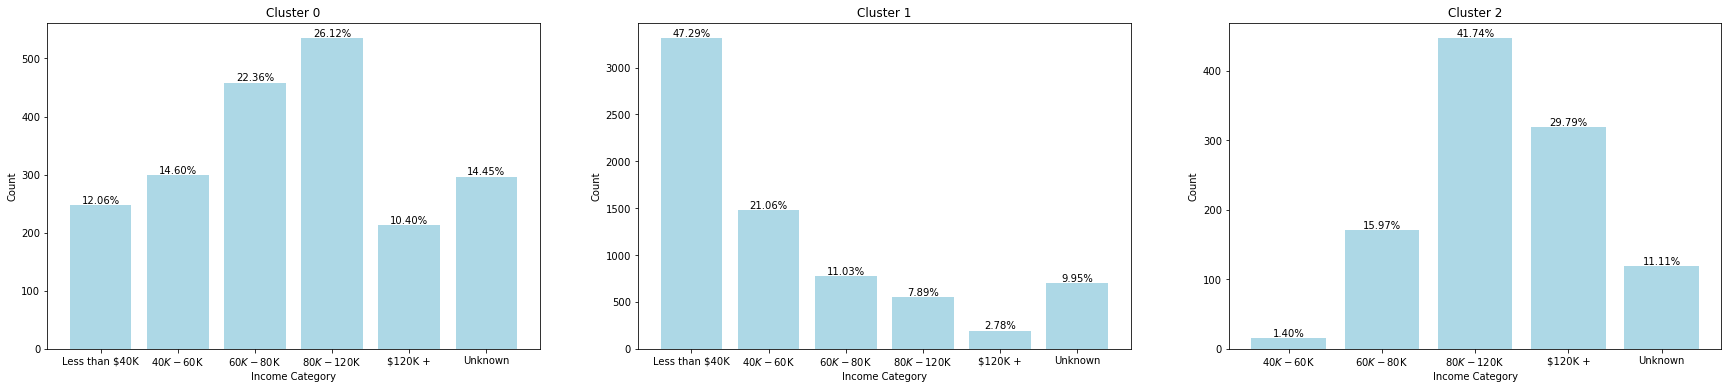

In [127]:
# Defino orden customizado para categorias
custom_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']

clusters_to_plot = [0, 1, 2]  

# Crea subtramas para varios clusters uno al lado del otro
fig, axs = plt.subplots(1, len(clusters_to_plot), figsize=(30, 6))

for i, cluster in enumerate(clusters_to_plot):
    ax = axs[i]
    fig.patch.set_facecolor('white')    
    df = df_bank_churners[df_bank_churners['cluster'] == cluster]['Income_Category'].value_counts()
    
    # Reordeno las categorias del eje x segun orden customizado
    df.index = pd.Categorical(df.index, categories=custom_order, ordered=True)
    df = df.sort_index()
    
    # Convierto el indice a texto
    df.index = df.index.astype(str)
    
    ax.bar(df.index, df.values, color='lightblue')
    ax.set(title=f'Cluster {cluster}', xlabel='Income Category', ylabel='Count')
    
    # Arego etiquetas de porcentage
    total_count = df.sum()
    for x, y in enumerate(df.values):
        percentage = (y / total_count) * 100
        ax.text(x, y, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()


El cluster 0 tiene el 50% de clientes con ingresos entre 60K y 120K, con distribución homogénea en las categorías restantes. El cluster 1 tiene el 70% de los clientes con ingresos menores a 60K y un 50% menos de 40K. Y el cluster 2 tiene el 70% de los ingresos de 80K para arriba.

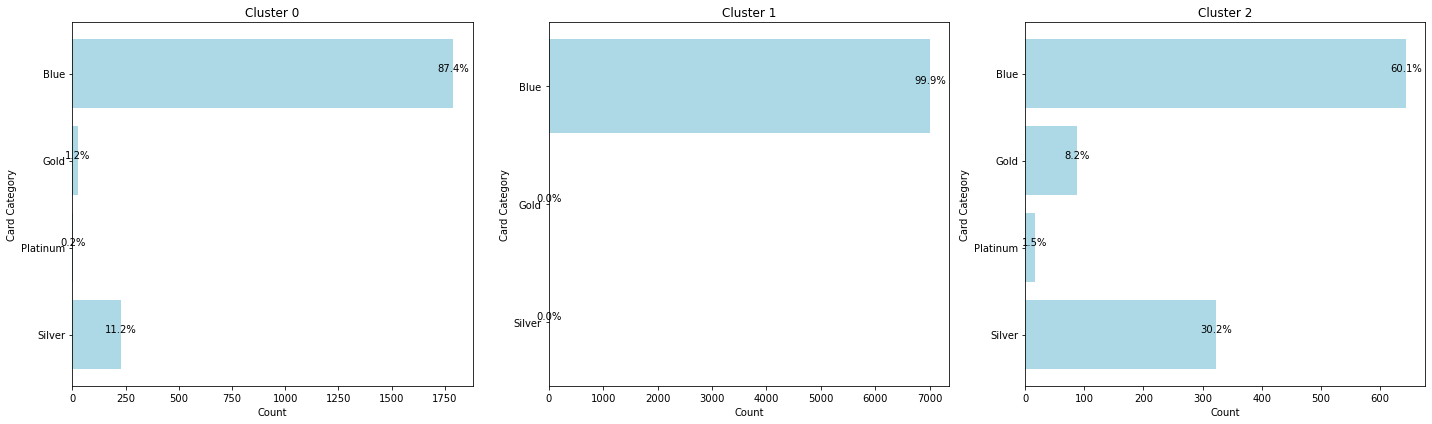

In [128]:
clusters_to_plot = [0, 1, 2]  

# Crea subtramas para varios clusters uno al lado del otro
fig, axs = plt.subplots(1, len(clusters_to_plot), figsize=(20, 6))

for i, cluster in enumerate(clusters_to_plot):
    ax = axs[i]
    fig.patch.set_facecolor('white')
    df = df_bank_churners[df_bank_churners['cluster'] == cluster]['Card_Category'].value_counts().sort_index(ascending=False)
    ax.barh(df.index, df.values, color='lightblue')

    # Calculo porcentajes para cada barra
    total = df.values.sum()
    percentages = (df.values / total) * 100

    # Agregor porcentajes a cada barra
    for j, (index, value) in enumerate(df.items()):
        ax.text(value + 0.1, index, f"{percentages[j]:.1f}%\n", ha='center', va='center')

    ax.set(title=f'Cluster {cluster}', ylabel='Card Category', xlabel='Count')

plt.tight_layout()
plt.show()

El cluster 0 tiene el 90% de clientes con tarjeta Blue y algunos con tarjeta Silver. Los del cluster 1 son exclusivamente de tarjeta azul. Y en el cluster 3 tenemos 60% de tarjeta Blue y un 30% de tarjeta Silver, con los restantes con tarjetas de alto nivel.

Según caraterísticas demográficas y de productos bancarios, los clusters son los siguientes:

- Cluster 0: Hombres de ingresos medios, con tarjeta azul
- Cluster 1: Mujeres de ingresos bajos, con tarjeta azul
- Cluster 2: Hombres de ingresos altos, con tarjetas azul y superiores

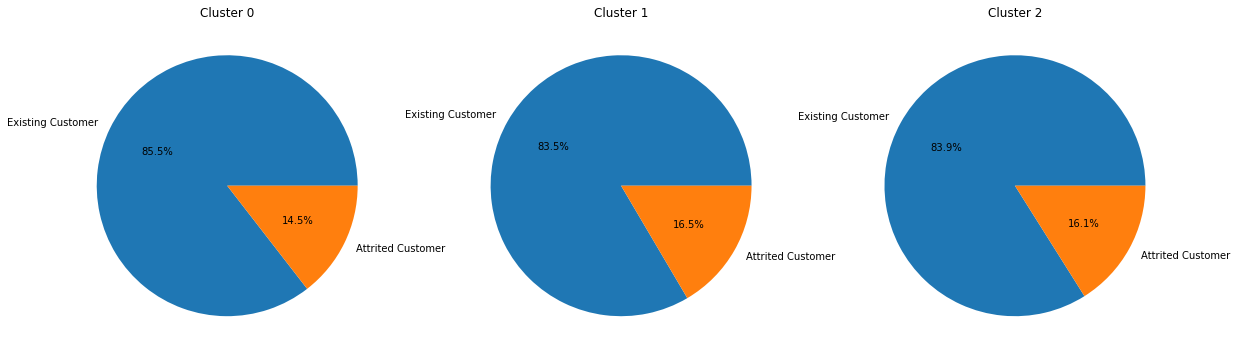

In [129]:
clusters_to_plot = [0, 1, 2]  

# Crea subtramas para varios clusters uno al lado del otro
fig, axs = plt.subplots(1, len(clusters_to_plot), figsize=(20, 6))

for i, cluster in enumerate(clusters_to_plot):
    ax = axs[i]
    fig.patch.set_facecolor('white')    
    df_bank_churners[df_bank_churners['cluster'] == cluster]['Attrition_Flag'].value_counts().sort_index(ascending=False).plot.pie(ax=ax, ylabel='', title=f'Cluster {cluster}', autopct='%.1f%%')

plt.show()

Los 3 clusters tienen un proporción similar en cuanto a clientes que hayan abandonado el banco.

***
***

## __Conclusión__

Basado en las características de actividad y demográficas, se puede obtener tres grupos/clusters de clientes distintos, los cuales suponen una aproximación distinta mediante acciones de marketing para evitar su abandono.

#### __Cluster 0: "Hombres cautelosos en el uso de crédito, con ingresos medios y tarjeta básica"__

Este cluster, representado por 2,048 personas, principalmente hombres de ingresos medios, se caracteriza por mantener un crédito promedio, pero que lo usa de manera limitada.

Acciones de Marketing para evitar el abandono:

- Ofrecer líneas de crédito adicionales atractivas para fomentar un mayor uso de la tarjeta.
- Brindar ofertas personalizadas que incentiven el uso continuo de la tarjeta.
- Proporcionar asesoramiento financiero y promociones exclusivas para este segmento.

#### __Cluster 1: "Mujeres de ingresos bajos con mucho uso, bajo crédito y tarjeta básica"__

Este es el cluster más grande con 7,008 personas, principalmente mujeres caracterizado por un bajo crédito pero un uso frecuente de la tarjeta. Son de ingresos bajos y tarjetas de nivel azul.

Acciones de Marketing para evitar el abandono:

- Ofrecer oportunidades de aumento de crédito para respaldar el uso continuo.
- Diseñar programas de lealtad que premien la fidelidad de estas clientas.
- Proporcionar educación financiera para mejorar la gestión del crédito.

#### __Cluster 2: "Hombres de ingresos altos, mucho crédito y bajo uso de tarjetas premium"__

Este cluster, compuesto por 1,071 personas, se caracteriza por tener un alto crédito disponible pero un uso limitado de la tarjeta. La mayoría de los clientes son hombres con ingresos altos y tarjetas de nivel azul y superiores.

Acciones de Marketing para evitar el abandono:

- Fomentar el uso de la tarjeta mediante ofertas exclusivas y recompensas.
- Ofrecer servicios de atención al cliente personalizados para resolver cualquier inquietud.
- Identificar oportunidades de inversión y ahorro que puedan ser de interés para este grupo.


__En resumen, estos tres clusters tienen características únicas que requieren estrategias de marketing específicas. Las estrategias deben estar diseñadas teniendo en cuenta las particularidades de cada grupo, como el uso de crédito, demografía e ingresos, para lograr el mayor nivel de retención, o en contraposición, el menor nivel de abandono posible.__